# Manim

<div>
<img src="imgs/cropped.png" width="1000"/>
</div>

### Mathematical Animation Engine by Grant Sanderson (_3b1b_ on YouTube)

_Short introduction by Steven Liu_

Introduction. Role. Was looking up tutorials online and stumbled upon 3Blue1Brown, a popular channel on YouTube presenting high quality videos focused on math topics such as linear algebra and calculus. I was impressed to find that all the videos are programatically scripted in Python. 

## Overview

Manim is an open source tool used to create high quality animations for the purpose of making educational math videos.

The 5 core components are:
1. Cairo
2. FFMpeg
3. SoX
4. $\TeX$
5. Python

- Cairo is a 2D graphics library (shapes and transforms)
- FFMpeg is a multimedia framework (videos)
- SoX is a sound processing program (audio)
- TeX is a typesetting system (math formulas)
- Python (Glue code and video scripting)

## Capabilities
- Text formatting, TeX formulas
- Arrays, Transforms
- 2D/3D graphs
- Audio
- Images

Show video below, for demonstration purposes..
https://www.youtube.com/watch?v=zLzLxVeqdQg

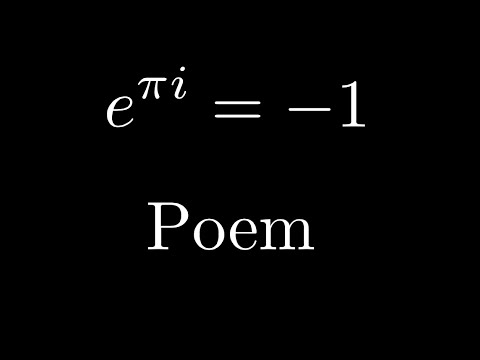

In [77]:
from IPython.display import Audio, Image, YouTubeVideo
YouTubeVideo(id='zLzLxVeqdQg',width=600,height=400)

## Installation
- Python 3.7
- Works on Windows, Mac OS, Linux
- Install system dependencies separately (cairo, FFmpeg, TeX, SoX)
- Anaconda, PyPI
- Docker image
- https://github.com/3b1b/manim

## Example Usage (Beginner)

In [78]:
import jupyter_manim

In [80]:
%%manim OurFirstVideo -l
# Equivalent to command $ manim [.py file] Scene -pl
from manimlib.imports import *
class OurFirstVideo(Scene):
    def construct(self):
        circle = Circle()
        self.play(ShowCreation(circle))
        self.wait(2)

How would we script a video? To begin, make a class that inherits from Manim. The `Scene` class expects a `construct` method to create animations. This must be implemented with additional methods for creating animations. In general, we 1. define objects, 2. play it.

```python
class OurFirstVideo(Scene):
    def construct(self):
        circle = Circle()# Square(color=RED), Rectangle(height=, width=),  Ellipse()
        triangle = Polygon(np.array([0,0,0]), np.array([1,1,0]), np.array([1,-1,0]))
        
        # self.add to just plot
        self.play(ShowCreation(circle)) # FadeIn, GrowFromCenter,
        self.play(FadeOut(circle))
        self.play(GrowFromCenter(triangle))
        self.play(Transform(triangle, circle))
```

## Core Library Components
- Scene `manimlib.scene`
- Mobject `manimlib.mobject`
- Animations `manimlib.animation`
- Camera `manimlib.camera`
- Constants `manimlib.constants`
- Utils `manimlib.utils`

## Running the tool
```sh
$ manim [-options] [.py file] [scene_names]
```

Manim can be executed from commandline, or we can run the python module. For this talk, I'm running it in Juypter Notebook. 

## Example Usage (Text, Tex)

In [81]:
%%manim Text -l

class Text(Scene):
    def construct(self):
        text = TextMobject("Hello", color=RED)
        text2 = TextMobject("World")
        text2.set_color_by_gradient(RED, PURPLE)
        text.next_to(text2,UP)

        self.wait(1)
        self.play(Write(text), Write(text2))
        self.play(FadeOut(text2), ReplacementTransform(text, text2))

TextMobject provides positioning, coloring, and so on
```python
#Making equations

des1 = TextMobject("With manim, you can write text like this ...")
first_eq = TextMobject("$$x = \\frac{-b \\pm \\sqrt{4ac}}{2a}$$")
des2 = TextMobject("Or this...")
second_eq = ["x", "=" "$\\frac{-b \\pm \\sqrt{4ac}}{2a}$"]
second_mob = TextMobject(*second_eq)
for i,item in enumerate(second_mob):
    if(i != 0):
        item.next_to(second_mob[i-1],RIGHT)
eq2 = VGroup(*second_mob)

#Positioning equations
des1.shift(2*UP)
des2.shift(2*UP)

#Animating equations
self.play(Write(des1))
self.play(Write(first_eq))
self.play(ReplacementTransform(des1, des2), Transform(first_eq, eq2))
self.wait(1)
self.add(eq2)
self.wait(1)
self.play(FadeOutAndShiftDown(eq2), FadeOutAndShiftDown(first_eq))
```

## Example Usage (Advanced)

In [76]:
%%manim Advanced -l
from manimlib.imports import *
class ThreeDSurface(ParametricSurface):
    def __init__(self, **kwargs):
        kwargs = {
        "u_min": -5,
        "u_max": 5,
        "v_min": -5,
        "v_max": 5,
        "checkerboard_colors": [BLUE_D]
        }
        ParametricSurface.__init__(self, self.func, **kwargs)

    def func(self, x, y):
        return np.array([x,y,np.cos(x) + np.sin(y)])

class Advanced(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(0.6, -0.7853981, 86.6)

        surface = ThreeDSurface()
        self.play(ShowCreation(surface))

        self.wait()
        self.move_camera(0.8*np.pi/2, -0.45*np.pi)
        self.begin_ambient_camera_rotation()
        self.wait(2)

3D Graphs.... the first 3DSurface object inherits from ParametricSurface. This is the interface to define the mathematical function. `**kwargs` just lets us pass in the xy range and some visual options. The actual Scene we animate inherits yet again from ThreeDScene, and calls the ThreeDSurface!

# Summary
- Powerful, high quality animations
- A lot more features than covered today!

## Additional Resources
- [https://github.com/3b1b/manim](https://github.com/3b1b/manim)
- Tutorials on Github
- Youtube series
- Reddit

## Credits
- Manim tutorials
- 3b1b Github